## 线性模型
### 基本形式

$$ f(x) = w^T x + b $$

其中，

$$
w = \begin{pmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_d \end{pmatrix}
$$

### 衡量
方差*(均方误差)*

$$
E = \sum_{i=1}^m (f(x_i)-y_i)^2
$$

### 求解
#### 闭式解
特殊地，当$x$仅有一元时，

$$
E_{(w, b)} = \sum_{i=1}^m (y_i - wx_i - b)^2
$$

对$w$求导，得

$$
\frac{\partial E_{(w,b)}} {\partial w} = 2 \left(w \sum_{i=1}^m x_i^2 - \sum_{i=1}^m (y_i - b)x_i \right)
$$

对$b$求导，得

$$
\frac{\partial E_{(w,b)}} {\partial b} = 2 \left(m b - \sum_{i=1}^m (y_i - w x_i) \right)
$$

令上二式等于0可得$w$与$b$的最优解：
$$
w = \frac { \sum_{i=1}^m y_i (x_i - \overline{x}) } { \sum_{i=1}^m x_i^2 - \frac {1} {m} \left( \sum_{i=1}^m x_i \right)^2 }
$$

$$
b = \frac{1}{m} \sum_{i=1}^m (y_i - w x_i)
$$

#### 机器学习
训练，最小化方差。

##### Tensorflow
引入两个库

In [1]:
import tensorflow as tf
import numpy as np

生成随机数据

In [2]:
x_data = np.float32(np.random.rand(1, 100))
y_data = 3.14 * x_data + 0.15926
print x_data, y_data

[[ 0.6230672   0.54278147  0.85767359  0.065623    0.10686581  0.54695368
   0.37374854  0.40073711  0.83288467  0.01348205  0.20796929  0.31770888
   0.93945754  0.60261577  0.90209281  0.62768233  0.77506185  0.5049153
   0.37930316  0.71424234  0.24224475  0.32759443  0.02822817  0.13684234
   0.26394993  0.77193427  0.00492724  0.80749798  0.84467018  0.08634188
   0.95996892  0.15012872  0.16593458  0.96522772  0.07576943  0.37469092
   0.02545067  0.64612556  0.09589808  0.29802889  0.34562123  0.45966339
   0.50198555  0.87769789  0.60350692  0.1991407   0.64388323  0.12225578
   0.35995808  0.89597982  0.34155455  0.36767876  0.81496614  0.83634406
   0.5307852   0.13100061  0.40343273  0.41835463  0.99052089  0.48921046
   0.40686446  0.59848094  0.18105167  0.62686926  0.74262303  0.35665512
   0.72287327  0.49666238  0.37527233  0.1476735   0.63964391  0.69754863
   0.97488487  0.33826196  0.74873734  0.56496209  0.21196418  0.4143436
   0.65475488  0.41207555  0.54455554  0

训练

In [3]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.zeros([1]))
y = W * x_data + b
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for step in np.arange(0,201):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(W),sess.run(b))
W1 = sess.run(W)
b1 = sess.run(b)
W1 = W1[0]
b1 = b1[0]
sess.close()

(0, array([ 0.99385691], dtype=float32), array([ 1.61999941], dtype=float32))
(20, array([ 2.50170994], dtype=float32), array([ 0.47587609], dtype=float32))
(40, array([ 2.9631598], dtype=float32), array([ 0.24697949], dtype=float32))
(60, array([ 3.0910058], dtype=float32), array([ 0.1835631], dtype=float32))
(80, array([ 3.12642622], dtype=float32), array([ 0.16599323], dtype=float32))
(100, array([ 3.13623929], dtype=float32), array([ 0.16112545], dtype=float32))
(120, array([ 3.13895822], dtype=float32), array([ 0.1597769], dtype=float32))
(140, array([ 3.13971138], dtype=float32), array([ 0.1594032], dtype=float32))
(160, array([ 3.13992023], dtype=float32), array([ 0.15929963], dtype=float32))
(180, array([ 3.13997793], dtype=float32), array([ 0.15927102], dtype=float32))
(200, array([ 3.13999391], dtype=float32), array([ 0.15926309], dtype=float32))


输出

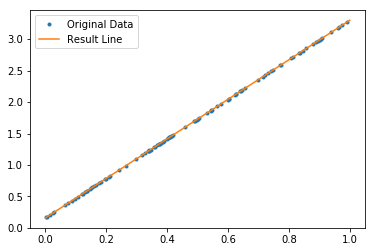

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data[0], y_data[0], '.', label='Original Data')
xx = np.linspace(0, 1)
plt.plot(xx, xx * W1 + b1, label='Result Line')
plt.legend()